In [1]:
import json
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import sys
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import pandas as pd
import os
import random

In [2]:
# !pip install opencv-python

In [3]:
# df = pd.read_csv('./EfficientDet/efficientdet_submission_50.csv')
# df = pd.read_csv('./Ensemble/submission/first.csv')
df = pd.read_csv('./val/val_swin_Hsmall_PA_smallAnchor_16.csv')
#result/
#./result/ens0.601_detRS_iou_0.5_skip_0.01_602.csv
df

PredictionString        image_id
0    0 0.99928826 202.19778 184.7935 733.0332 669.9...  train/0000.jpg
1    0 0.8305121 213.8222 289.39703 916.6895 820.01...  train/0023.jpg
2    0 0.26741207 272.41837 667.5387 351.77176 729....  train/0027.jpg
3    0 0.51825225 518.2228 632.6683 582.8334 693.08...  train/0028.jpg
4    0 0.24009033 630.58984 155.55536 691.7848 178....  train/0067.jpg
..                                                 ...             ...
484  0 0.9290295 545.74286 425.20007 577.60846 488....  train/4841.jpg
485  0 0.0637528 746.9971 216.2677 802.1909 274.029...  train/4852.jpg
486  0 0.23332866 474.95963 558.9056 552.2016 580.9...  train/4854.jpg
487  0 0.4532158 479.8538 147.2464 729.92993 352.53...  train/4863.jpg
488   1 0.998628 250.38765 339.0885 693.1084 736.2914   train/4870.jpg

[489 rows x 2 columns]

In [4]:
def get_file_path(json_file, image_num):
    file_path = json_file['images'][image_num]['file_name']
    return file_path

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_annotations(df, image_num):
    # anns = [ann for ann in json_file['annotations'] if ann['image_id'] == image_num]
    labels = []
    anns = []
    ann = []
    if type(df.loc[image_num]['PredictionString']) == float:
        return anns
    
    cur_df = df.loc[image_num]['PredictionString'].split()
    for j, _ in enumerate(cur_df):
        if j % 6 == 0:
            labels.append(int(cur_df[j]))
        elif j % 6 == 1:
            continue
        else:
            ann.append(float(cur_df[j]))
            if len(ann) == 4:
                anns.append(ann)
                ann = []
    return anns, labels

def plot_bbox(image_list, anns, labels):
    classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")
    # one picture size
    fig_size = 7
    # num of pictures in one raw
    cols = 4
    
    # num of raw is setted by num of all picture and cols
    if len(image_list)%cols == 0 :
        raws = len(image_list)//cols
    else :
        raws = len(image_list)//cols + 1
    fig = plt.figure(figsize=(cols*fig_size+1 ,fig_size*(len(image_list)//cols + 1)))#
    for i, image in enumerate(image_list) :
        for ann, label in zip(anns[i], labels[i]):
            color = list(np.random.random(size=3) * 256)
            xmin, ymin, xmax, ymax = ann
            randnum = random.randint(-40,41)
            image_list[i] = cv2.putText(image, classes[label], (int((xmin)), int((ymin+ymax)/2)+randnum), cv2.FONT_HERSHEY_SIMPLEX, 1.5, color, 3)
            # image_list[i] = cv2.rectangle(image, (int(xmin),int(ymin)), (int(xmax), int(ymax)), color, 3)
            image_list[i] = cv2.rectangle(image, (int(xmin),int(ymin)), (int(xmax), int(ymax)), color, 3)
            ax = fig.add_subplot(raws, cols, i+1)
            ax.imshow(image_list[i])
            ax.set_xticks([]), ax.set_yticks([])
    fig.tight_layout()
    plt.show()    
    
def plot_box(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image)

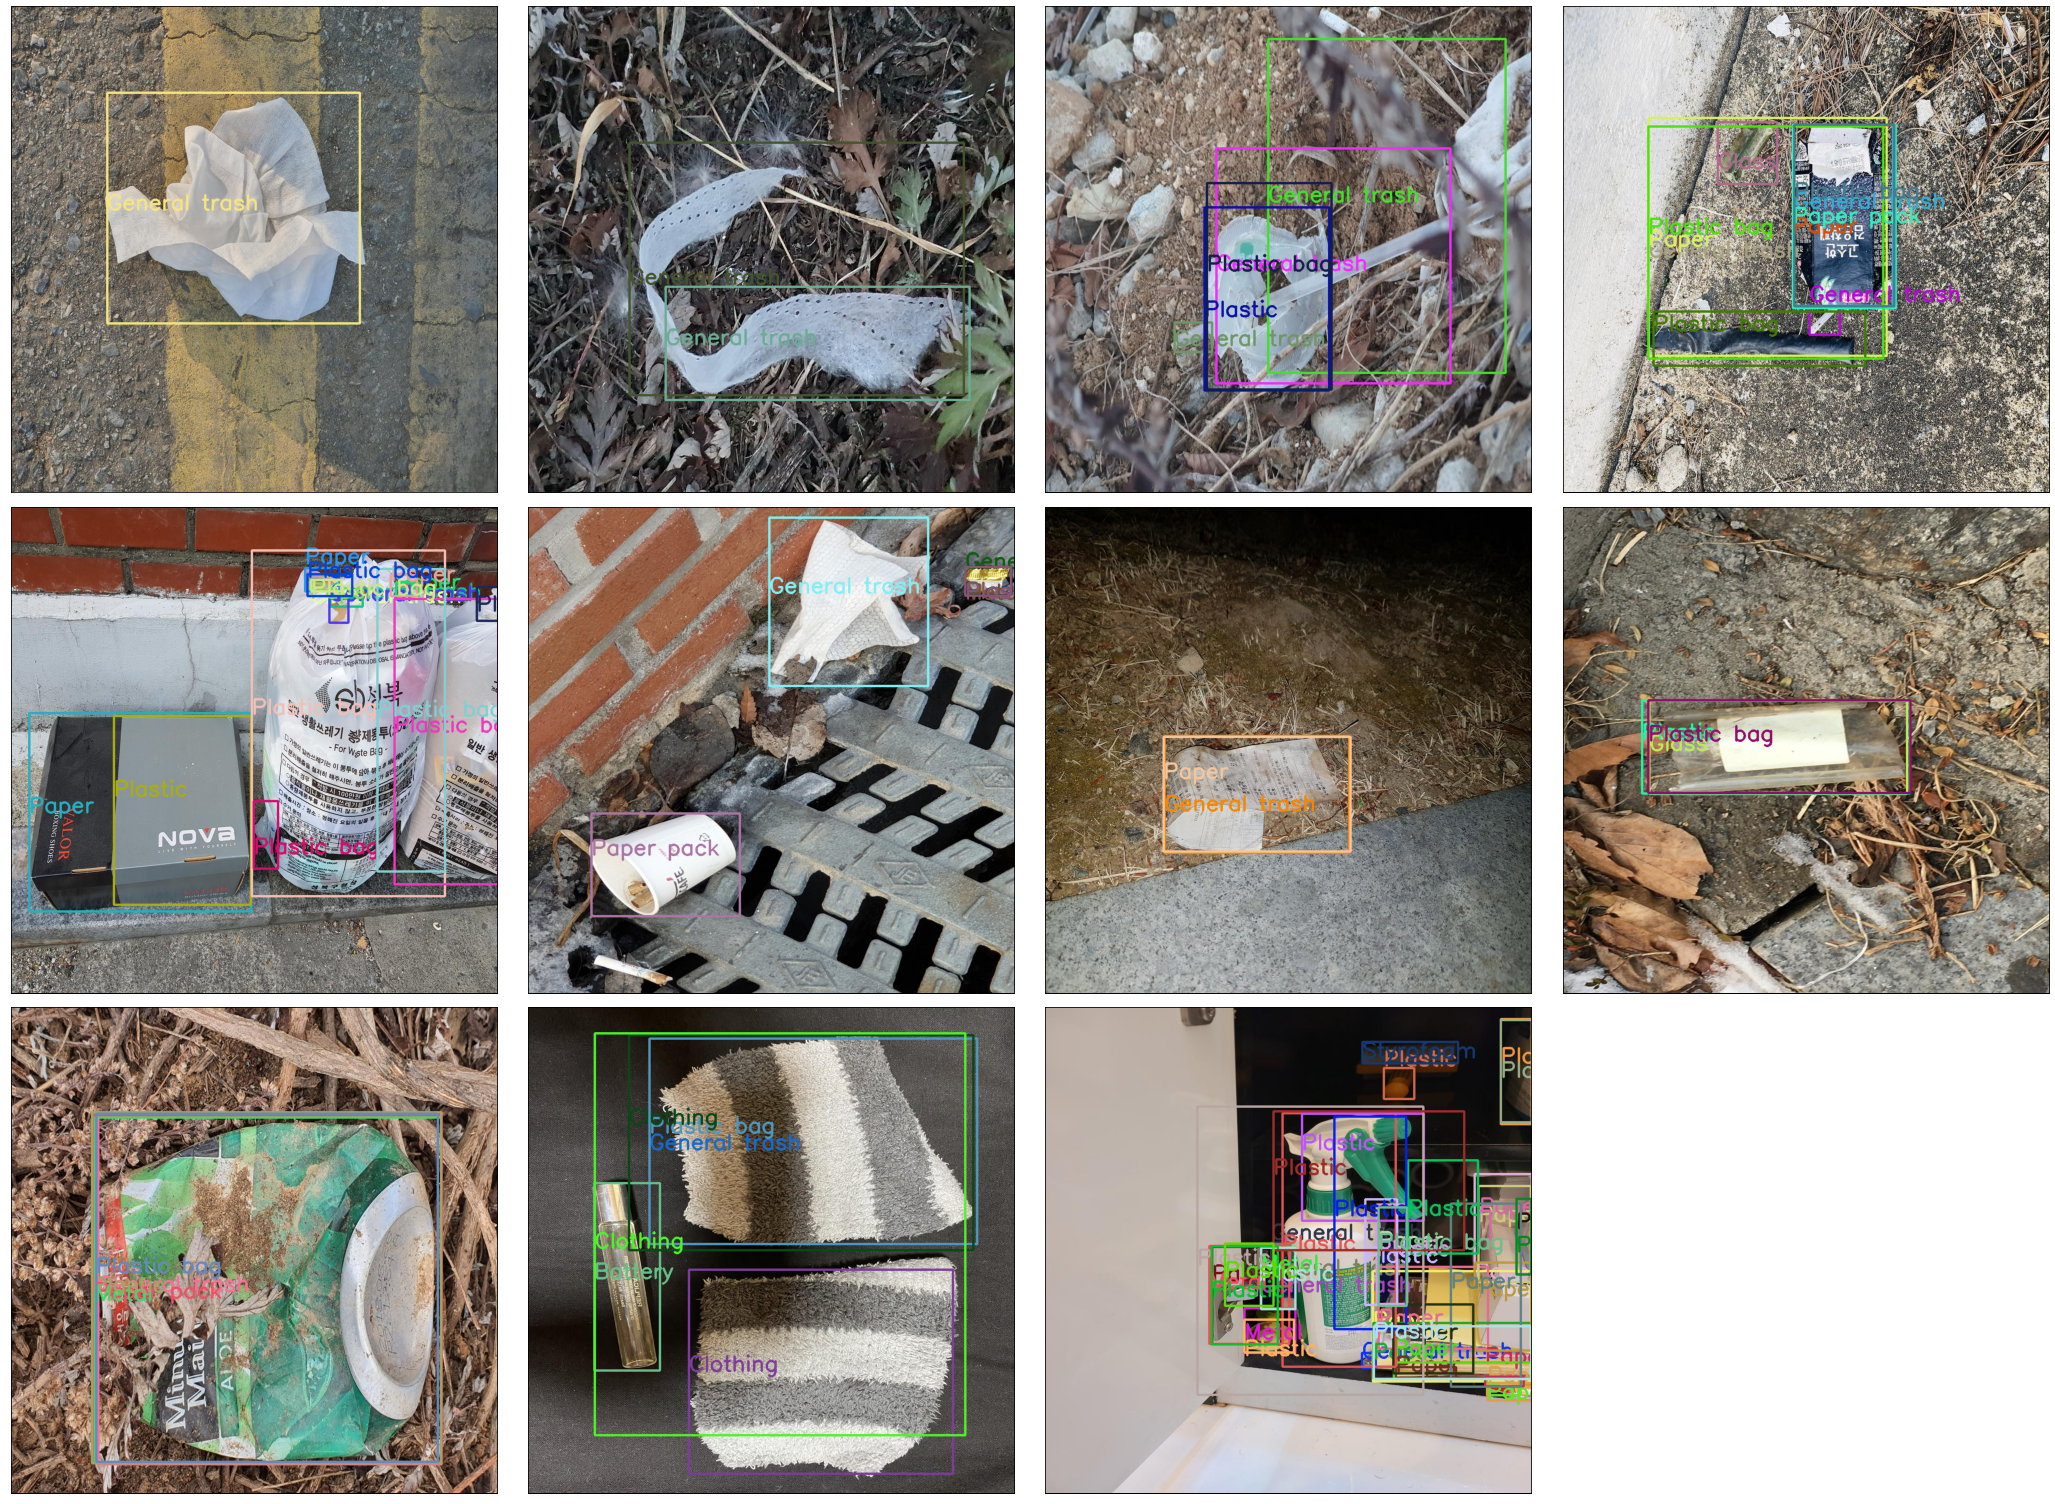

In [5]:
with open('../../../dataset/split_valid.json','r') as f:
    test_json = json.load(f)
dataset_path = '../../../dataset/'
image_list = []
anns_list = []
labels_list = []

# set image range
start = 0
finish = 10
for i in range(start, finish+1) :
    image_number = i
    file_path = get_file_path(test_json, image_number)
    anns, labels = get_annotations(df, image_number)
    image = read_image(dataset_path, file_path)
    image_list.append(image)
    anns_list.append(anns)
    labels_list.append(labels)
    
# plot_box(image)
plot_bbox(image_list, anns_list, labels_list)
